# EAS 4610 - Earth Systems Modeling - Final Project
## Landscape Evolution - Changes in Elevation due to Erosion over Time
### By: Carson Clements, Maci Harrell, Kevin Lu
### Due: Tuesday, December 5th at 11:59 PM ET
### Requirements/Rubric: https://gatech.instructure.com/courses/321828/assignments/1404688
## Original Paper (Landscape Evolution, Willgoose 2004): https://www.annualreviews.org/doi/pdf/10.1146/annurev.earth.33.092203.122610

### The Necessary Imports

In [73]:
import numpy as np
import matplotlib.pyplot as plt

### Parameterization and Grid-Setting

In [74]:
# Parameters
Grid_Length = 100  # Length in meters
T = 1000   # Simulation time - years

Nx = 100   # Number of spatial grid points
Nt = 500   # Number of time steps
dx = Grid_Length / (Nx - 1)
dt = T / Nt

Slope_Peak = 20 # meters
Slope_Width_Constant = 100

U = 0     # Tectonic Uplift - meters
lamb = 365*24*60 # Occurrence of entrainment (detachment) events
M = 1e-7 # The average mass of sediment per entrainment event. Around 100 grains of Sand.
L = 1 # the average travel distance of the sendiment - meters

# Advection and diffusion coefficients
u = 0.01   # Advection velocity - Transport of landscape downwind with time - meters per year
D = lamb*M*L  # Diffusion coefficient - equivalent to Qs

### Defining Functions for a Constant Qs

In [75]:
def Initialize(Nx, Slope_Width, Slope_Peak, Nt):
    # Initial condition with slope
    X = np.arange(0, Nx, 1)
    R_initial = (np.exp(-((X-(0.5*Nx))**2)/Slope_Width))*Slope_Peak

    # Arrays to store the regolith depth at each grid point and time step
    R = np.zeros((Nt, Nx))


    # Set initial & Dirichlet boundary condition
    R[0, :] = R_initial
    R[:, 0] = R_initial[0]  # Left boundary
    R[:, -1] = R_initial[-1]  # Right boundary
    
    return R

In [76]:
def Solve(R, Adv_Coeff, Diff_Coeff, deltaT, deltaX, Tec_Uplift):
    # Finite difference scheme for advection-diffusion equation with Dirichlet and Neumann boundary conditions
    for k in range(0, Nt - 1):
        for i in range(1, Nx - 1):
            advection_term = Adv_Coeff * (R[k, i + 1] - R[k, i - 1]) / (2 * deltaX)
            diffusion_term = Diff_Coeff * (R[k, i + 1] - 2 * R[k, i] + R[k, i - 1]) / deltaX**2
            R[k + 1, i] = R[k, i] + deltaT * (diffusion_term - advection_term + Tec_Uplift)
    return R

### Defining Functions for a non-Constant Qs

In [77]:
def VInitialize(Nx, Slope_Width, Slope_Peak, Nt): # Initializing the Grid
    # Initial condition with slope
    X = np.arange(0, Nx, 1)
    R_initial = (np.exp(-((X-(0.5*Nx))**2)/Slope_Width))*Slope_Peak

    # Arrays to store the regolith depth at each grid point and time step
    R = np.zeros((Nt, Nx))

    # Set initial & Dirichlet boundary condition
    R[0, :] = R_initial
    R[:, 0] = R_initial[0]  # Left boundary
    R[:, -1] = R_initial[-1]  # Right boundary
    
    return R

In [78]:
def VSolve(R, Adv_Coeff, Diff_Coeff, deltaT, deltaX, Tec_Uplift, sed_Vel):
    # Finite difference scheme for advection-diffusion equation with Dirichlet and Neumann boundary conditions
    # Variable Value for Qs based upon Formula D = Qs = Depth*Sediment Velocity
    for k in range(0, Nt - 1):
        for i in range(1, Nx - 1):
            Diff_Coeff = R[k, i] * sed_Vel
            advection_term = Adv_Coeff * (R[k, i + 1] - R[k, i - 1]) / (2 * deltaX)
            diffusion_term = Diff_Coeff * (R[k, i + 1] - 2 * R[k, i] + R[k, i - 1]) / deltaX**2
            R[k + 1, i] = R[k, i] + dt * (diffusion_term - advection_term + U)
            #print(Diff_Coeff)
    return R

## Figures

### Plot 1 - Low vs High Diffusion

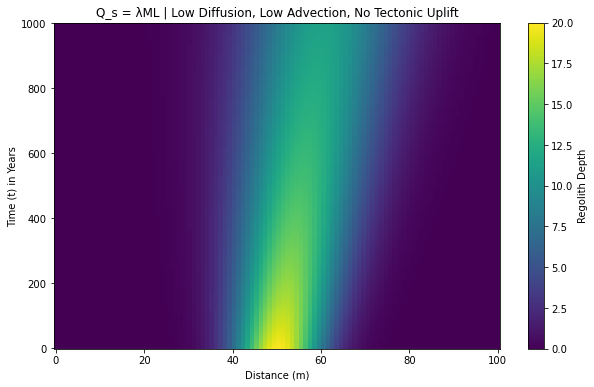

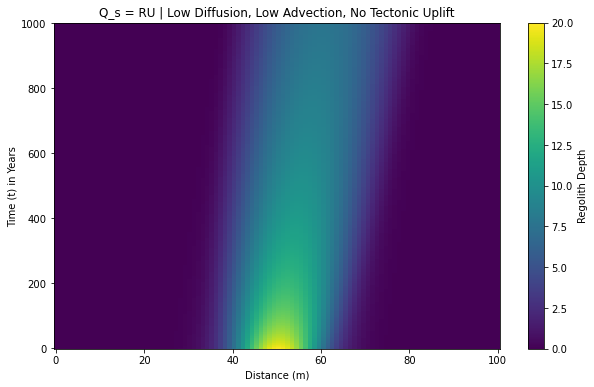

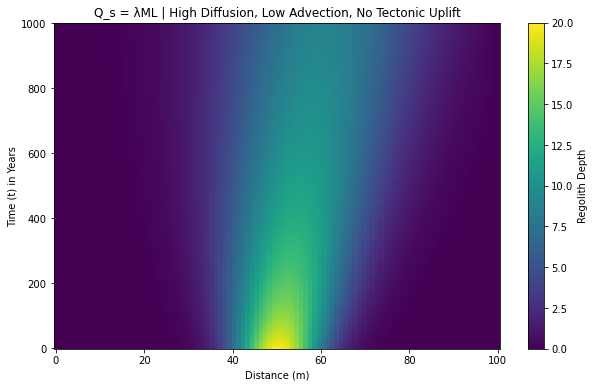

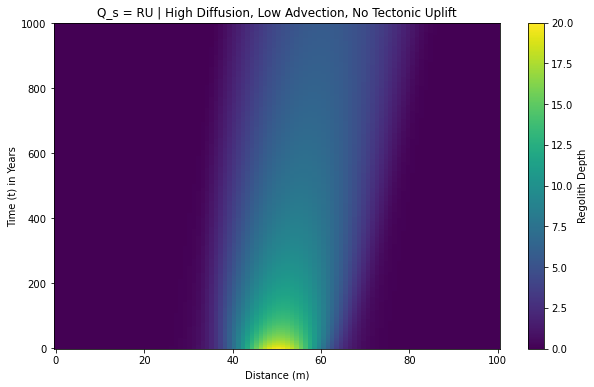

In [79]:
# Plot the results with Dirichlet and Neumann boundary conditions - 4 Panel Plots
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, D, dt, dx, U)
R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, 0.01, 0, dt, dx, 0, 0.01)
R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, u, lamb*M*2, dt, dx, U)
R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, 0.01, 0, dt, dx, 0, 0.02)
x_values = np.linspace(0, Grid_Length, Nx)
time_values = np.linspace(0, T, Nt)

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | High Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | High Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

### Plot 2 - Insignificant vs Significant Tectonic Uplift

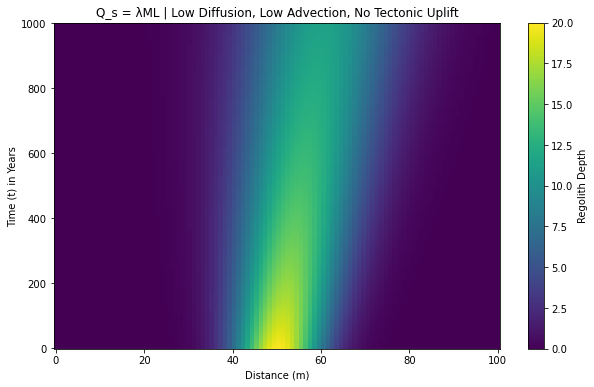

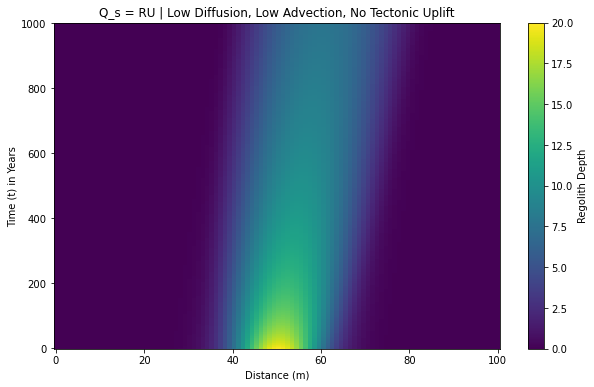

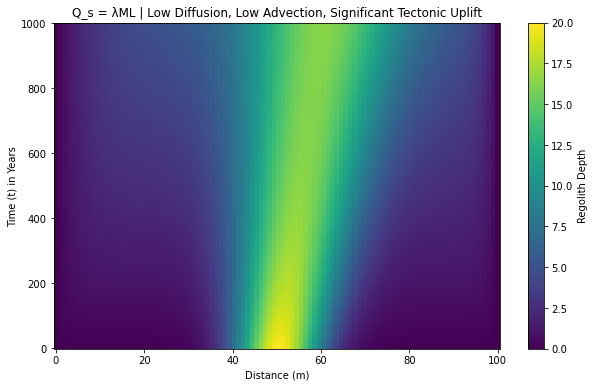

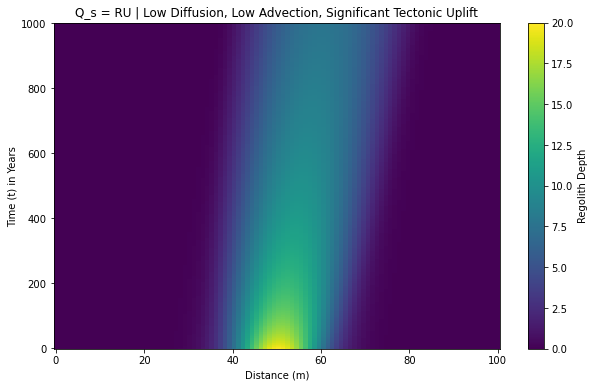

In [80]:
# Plot the results with Dirichlet and Neumann boundary conditions - 4 Panel Plots
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, D, dt, dx, U)
R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, 0.01, 0, dt, dx, 0, 0.01)
R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, u, lamb*M*1, dt, dx, 0.005)
R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, 0.01, 0, dt, dx, 0.005, 0.01)
x_values = np.linspace(0, Grid_Length, Nx)
time_values = np.linspace(0, T, Nt)

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | Low Diffusion, Low Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | Low Diffusion, Low Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

### Plot 3 - Low vs High Advection

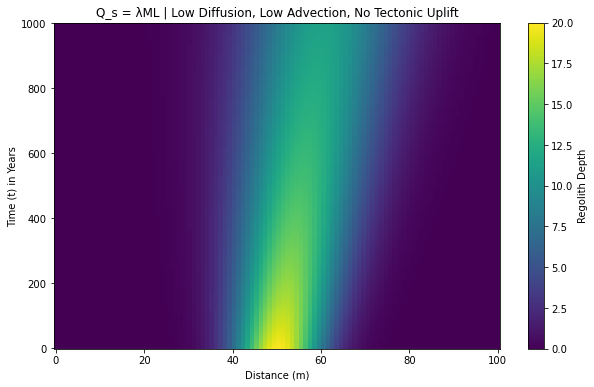

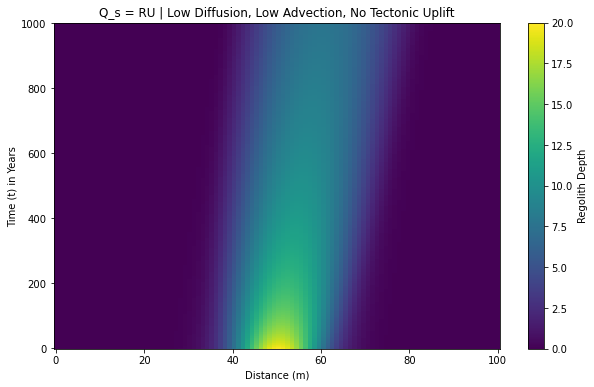

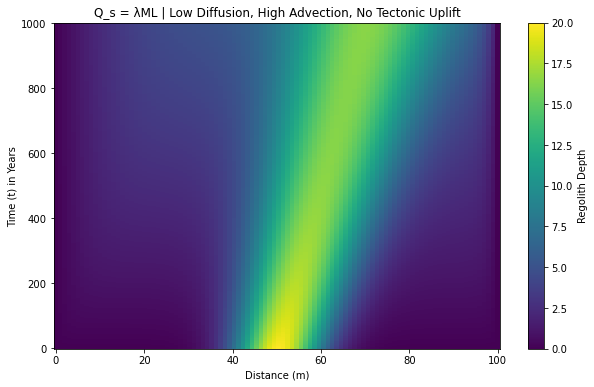

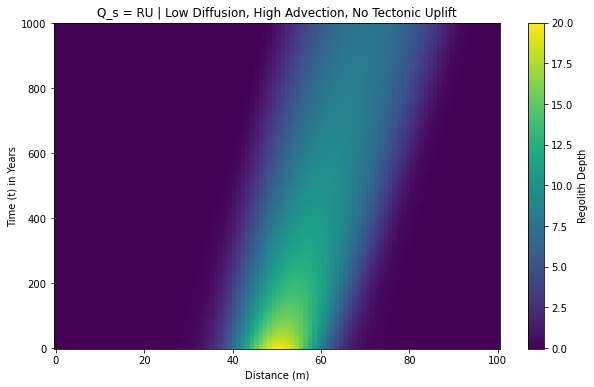

In [81]:
# Plot the results with Dirichlet and Neumann boundary conditions - 4 Panel Plots
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, D, dt, dx, U)
R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, 0.01, 0, dt, dx, 0, 0.01)
R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, 2*u, lamb*M*1, dt, dx, 0.005)
R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, 0.02, 0, dt, dx, 0, 0.01)
x_values = np.linspace(0, Grid_Length, Nx)
time_values = np.linspace(0, T, Nt)

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | Low Diffusion, High Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | Low Diffusion, High Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

### Plot 4 - Low vs High Advection/Diffusion

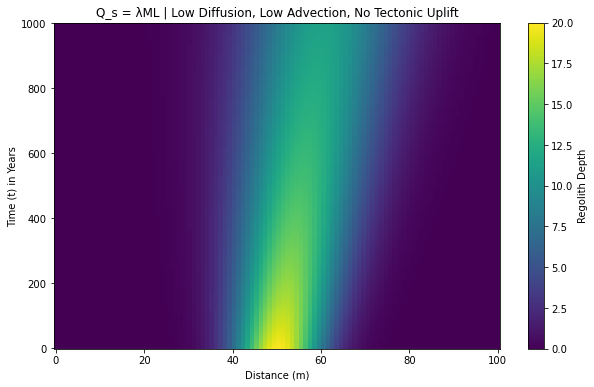

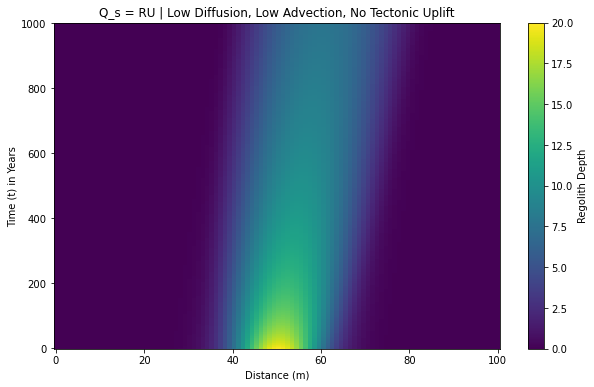

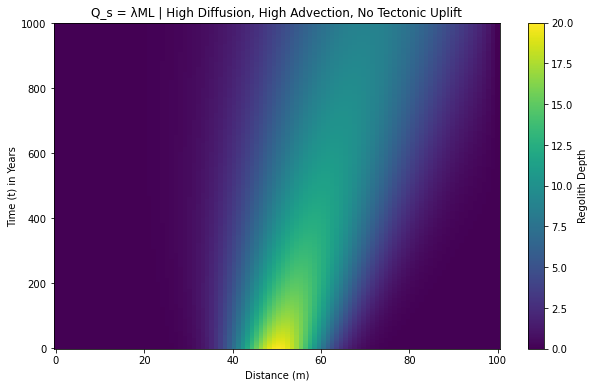

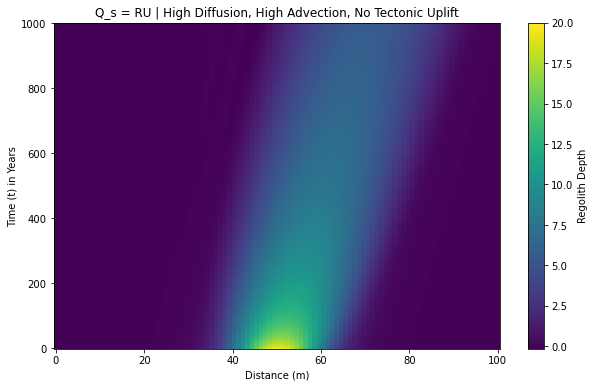

In [82]:
# Plot the results with Dirichlet and Neumann boundary conditions - 4 Panel Plots
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, D, dt, dx, U)
R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, 0.01, 0, dt, dx, 0, 0.01)
R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, 2*u, lamb*M*2, dt, dx, 0)
R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, 0.02, 0, dt, dx, 0, 0.02)
x_values = np.linspace(0, Grid_Length, Nx)
time_values = np.linspace(0, T, Nt)

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | High Diffusion, High Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | High Diffusion, High Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

### Plot 5 - Low/Insignificant vs High/Significant Diffusion/Uplift

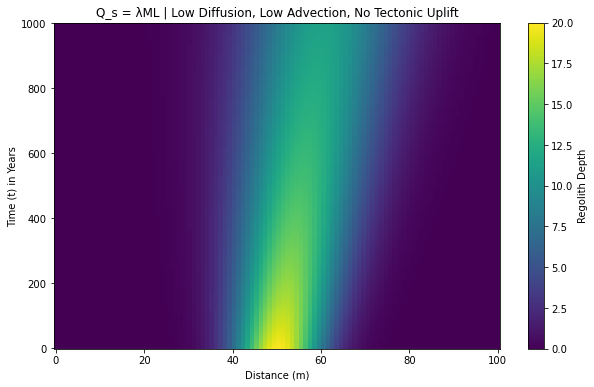

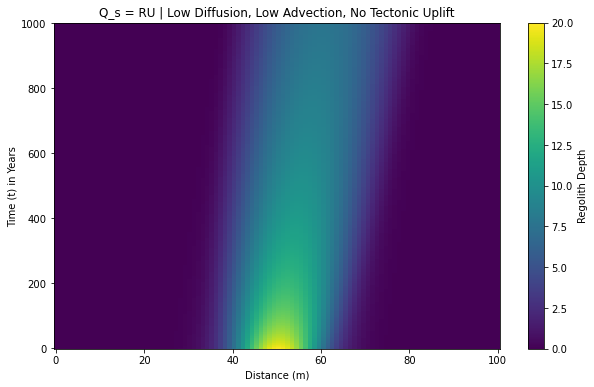

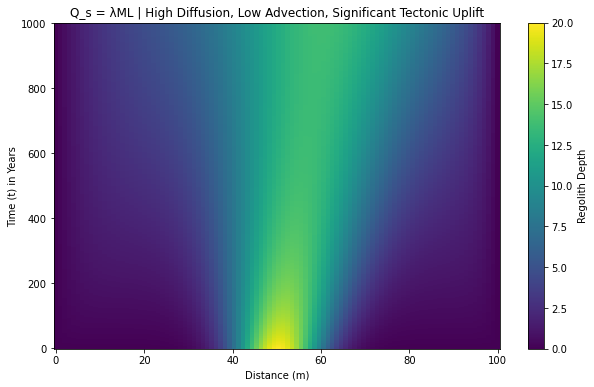

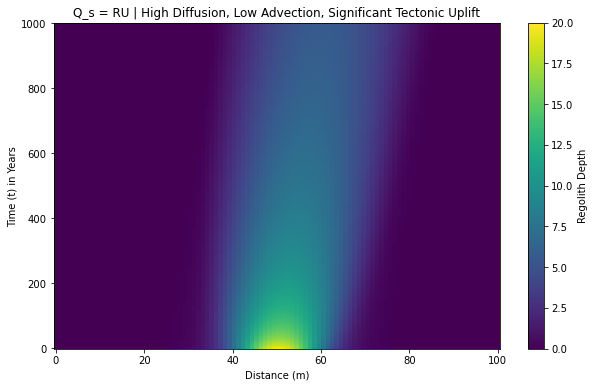

In [83]:
# Plot the results with Dirichlet and Neumann boundary conditions - 4 Panel Plots
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, D, dt, dx, U)
R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, 0.01, 0, dt, dx, 0, 0.01)
R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, u, lamb*M*2, dt, dx, 0.005)
R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, 0.01, 0, dt, dx, 0.005, 0.02)
x_values = np.linspace(0, Grid_Length, Nx)
time_values = np.linspace(0, T, Nt)

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | High Diffusion, Low Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | High Diffusion, Low Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

### Plot 6 - Low/Insignificant vs High/Significant Advection/Uplift

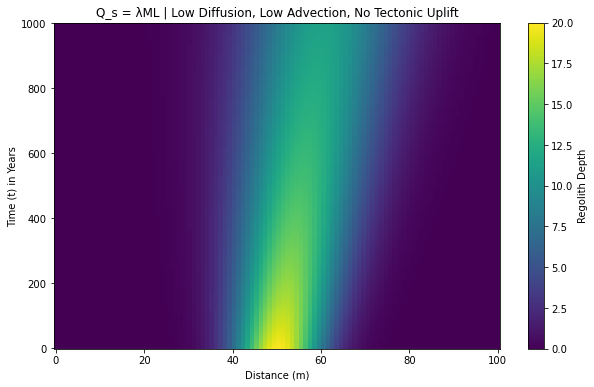

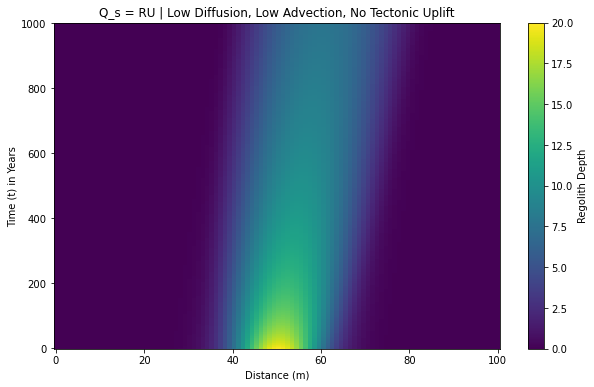

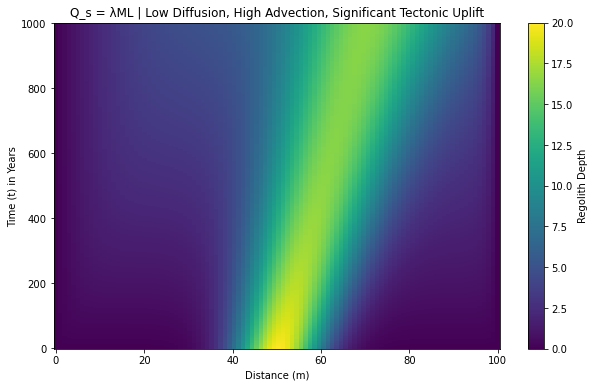

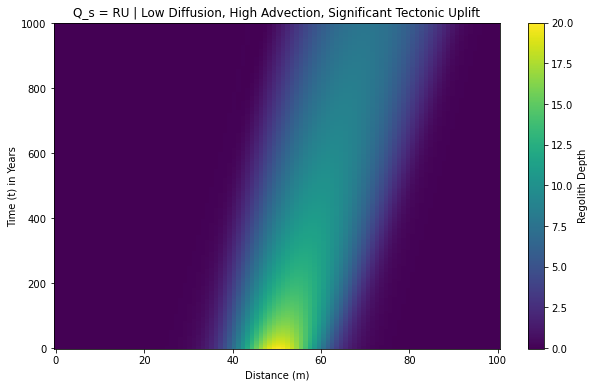

In [84]:
# Plot the results with Dirichlet and Neumann boundary conditions - 4 Panel Plots
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, D, dt, dx, U)
R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, 0.01, 0, dt, dx, 0, 0.01)
R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, 2*u, lamb*M*1, dt, dx, 0.005)
R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, 0.02, 0, dt, dx, 0.005, 0.01)
x_values = np.linspace(0, Grid_Length, Nx)
time_values = np.linspace(0, T, Nt)

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | Low Diffusion, High Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | Low Diffusion, High Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

### Plot 7 - Low/Low/Insignificant vs High/High/Significant Advection/Diffusion/Uplift

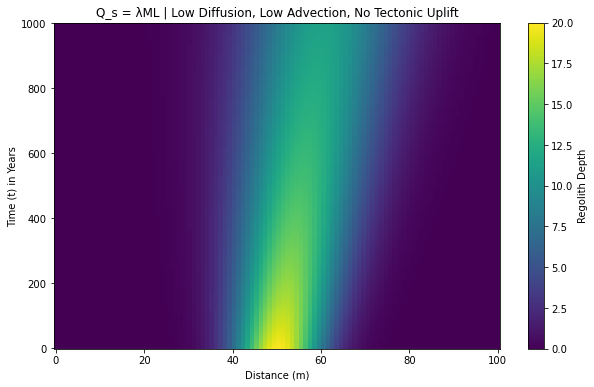

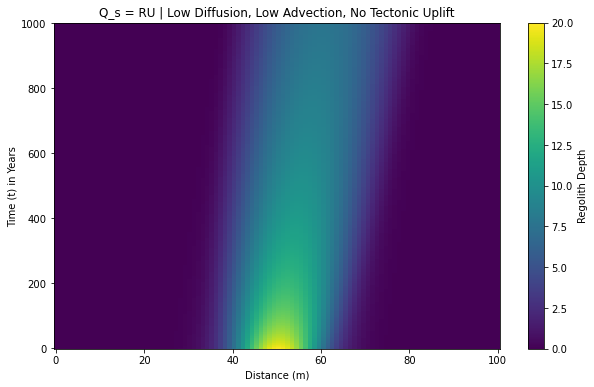

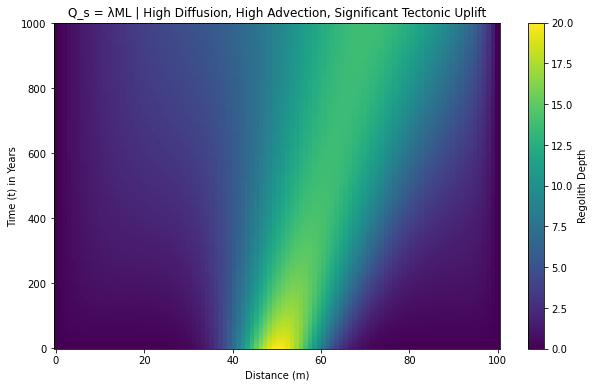

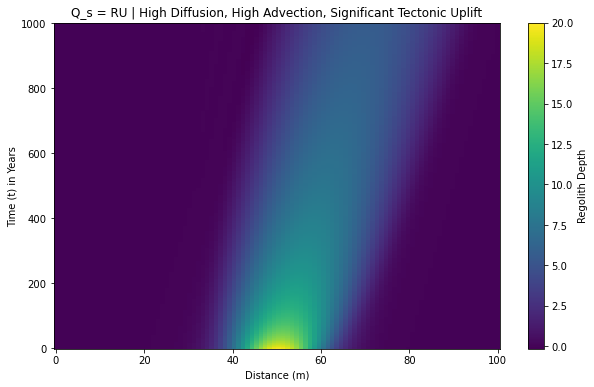

In [85]:
# Plot the results with Dirichlet and Neumann boundary conditions - 4 Panel Plots
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, D, dt, dx, U)
R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, 0.01, 0, dt, dx, 0, 0.01)
R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, 2*u, lamb*M*2, dt, dx, 0.005)
R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, 0.02, 0, dt, dx, 0.005, 0.02)
x_values = np.linspace(0, Grid_Length, Nx)
time_values = np.linspace(0, T, Nt)

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = λML | High Diffusion, High Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Regolith Depth')
plt.title('Q_s = RU | High Diffusion, High Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

In [86]:
# U = 0     # Tectonic Uplift - meters
# lamb = 365*24*60 # Occurrence of entrainment (detachment) events
# M = 1e-7 # The average mass of sediment per entrainment event. Around 100 grains of Sand.
# L = 2 # the average travel distance of the sendiment - meters

# # Advection and diffusion coefficients
# u = 0.01   # Advection velocity - Transport of landscape downwind with time - meters per year
# D = lamb*M*L  # Diffusion coefficient - equivalent to Qs

In [87]:
# R = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
# R = Solve(R, u, lamb*M*L, dt, dx, U)

# plt.figure(figsize=(10, 6))
# plt.pcolormesh(x_values, time_values, R, shading='auto', cmap='viridis')
# plt.colorbar(label='Regolith Depth')
# plt.title('Advection-Diffusion Equation with Dirichlet and Neumann Boundary Conditions')
# plt.xlabel('Distance (m)')
# plt.ylabel('Time (t) in Years')
# plt.show()

In [88]:
# U = 0.005     # Tectonic Uplift - meters
# lamb = 365*24*60 # Occurrence of entrainment (detachment) events
# M = 1e-7 # The average mass of sediment per entrainment event. Around 100 grains of Sand.
# L = 1 # the average travel distance of the sendiment - meters

# # Advection and diffusion coefficients
# u = 0.01   # Advection velocity - Transport of landscape downwind with time - meters per year
# D = lamb*M*L  # Diffusion coefficient - equivalent to Qs

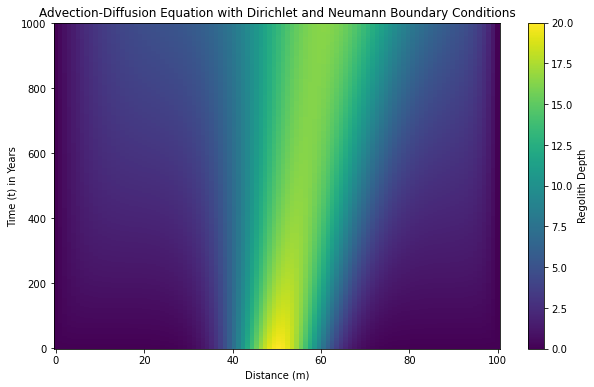

In [89]:
# R = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
# R = Solve(R, u, lamb*M*L, dt, dx, U)

# plt.figure(figsize=(10, 6))
# plt.pcolormesh(x_values, time_values, R, shading='auto', cmap='viridis')
# plt.colorbar(label='Regolith Depth')
# plt.title('Advection-Diffusion Equation with Dirichlet and Neumann Boundary Conditions')
# plt.xlabel('Distance (m)')
# plt.ylabel('Time (t) in Years')
# plt.show()

In [90]:
# U = 0.005     # Tectonic Uplift - meters
# lamb = 365*24*60 # Occurrence of entrainment (detachment) events
# M = 1e-7 # The average mass of sediment per entrainment event. Around 100 grains of Sand.
# L = 2 # the average travel distance of the sendiment - meters

# # Advection and diffusion coefficients
# u = 0.01   # Advection velocity - Transport of landscape downwind with time - meters per year
# D = lamb*M*L  # Diffusion coefficient - equivalent to Qs

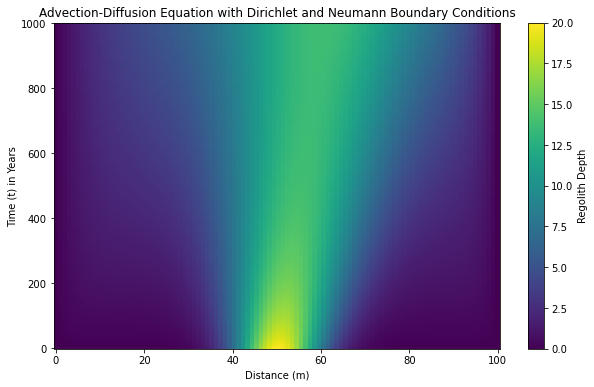

In [91]:
# R = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
# R = Solve(R, u, lamb*M*L, dt, dx, U)

# plt.figure(figsize=(10, 6))
# plt.pcolormesh(x_values, time_values, R, shading='auto', cmap='viridis')
# plt.colorbar(label='Regolith Depth')
# plt.title('Advection-Diffusion Equation with Dirichlet and Neumann Boundary Conditions')
# plt.xlabel('Distance (m)')
# plt.ylabel('Time (t) in Years')
# plt.show()

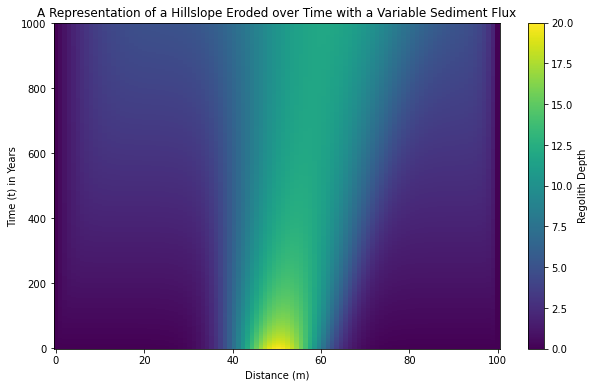

In [92]:
# # Calling the Above Functions and Plotting Them

# R = VInitialize(100, 100, 20, 500)
# R = VSolve(R, 0.01, 0, 2, 1, 0, 0.01) # sed_Vel must be .01 m/yr or less for stability purposes
# x_values = np.linspace(0, Grid_Length, Nx)
# time_values = np.linspace(0, T, Nt)

# plt.figure(figsize=(10, 6))
# plt.pcolormesh(x_values, time_values, R, shading='auto', cmap='viridis')
# plt.colorbar(label='Regolith Depth')
# plt.title('A Representation of a Hillslope Eroded over Time with a Variable Sediment Flux')
# plt.xlabel('Distance (m)')
# plt.ylabel('Time (t) in Years')
# plt.show()

In [93]:
# fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), constrained_layout=True)
# axlist = axarr.flatten()

# fig, axs = plt.subplots(2, 2)
# cmaps = ['viridis']
# i = 1
# for col in range(2):
#     for row in range(2):
#         ax = axs[row, col]
#         pcm = ax.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
#         fig.colorbar(pcm, ax=ax)



# cmaps = ['viridis']
# fig, axs = plt.subplots(nrows=2, ncols=2)

# for col in range(1):
#     for row in range(1):
#         plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')